<a href="https://colab.research.google.com/github/RODRIGORUBIO1991/PythonCode/blob/main/IT%20SALARIOS/IT_Salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'> IT Salarios <h1>


**Storytelling IT Salarios**

res un joven profesional del sector IT, recién graduado de la universidad y estás buscando tu primer trabajo en la industria. Te sientes abrumado por la cantidad de información que hay en línea y no sabes por dónde empezar a buscar. ¿Qué empresas son las mejores para trabajar? ¿Cuáles ofrecen los mejores salarios? ¿Cómo puedes saber si estás siendo tratado de manera justa en cuanto a la remuneración?

Pero no te preocupes, ¡estamos aquí para ayudarte! Hemos desarrollado una herramienta en línea que te permite calificar las empresas en las que has trabajado y compartir tus experiencias con la comunidad. Además, hemos investigado a fondo la situación laboral en el sector IT, analizando datos estadísticos relevantes para responder a las preguntas que te preocupan.

Nuestro estudio ha revelado algunos datos preocupantes. Descubrimos que hay una brecha de género significativa en la industria, con una sobrerrepresentación de hombres en puestos de liderazgo y una subrepresentación de mujeres. También encontramos que los salarios en el sector pueden variar significativamente según la experiencia y la permanencia en un puesto de trabajo, y que existe una inequidad de género en cuanto a la remuneración.

Pero no todo son malas noticias. En nuestro informe te presentaremos los hallazgos de nuestro estudio de una manera clara y accesible, utilizando visualizaciones de datos y análisis detallados para respaldar nuestras hipótesis. Nuestro objetivo es proporcionarte la información que necesitas para tomar decisiones informadas sobre tu carrera en el sector IT y para ayudar a nuestra comunidad de profesionales del sector IT a navegar por el mercado laboral.

En definitiva, nuestro objetivo es ayudarte a tener éxito en el mundo de la tecnología. ¡Únete a nosotros en este emocionante viaje hacia el éxito en el mundo de la tecnología y juntos trabajemos para mejorar la situación laboral en el sector IT!

**importando librerias y cargando el Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score




url = 'https://raw.githubusercontent.com/eea-uba/EEA-2022/main/Fuentes/Encuesta%20de%20remuneracion%20salarial%20-%202020.1.csv'
df = pd.read_csv(url, index_col=0)

**Borro Columnas y cambios de nombres de columnas**

In [2]:
#Cambio nombre de Me identifico por Genero

df.rename(columns= {"Me identifico":"Genero"}, inplace = True)

#Cambio nombre de Tengo por Edad
df.rename(columns= {"Tengo":"Edad"}, inplace = True)

#Quito lo de tu moneda local

df.rename(columns= {"Salario mensual BRUTO (en tu moneda local)":"SalarioB"}, inplace = True)


df.rename(columns= {"Salario mensual NETO (en tu moneda local)":"SalarioN"}, inplace = True)


#Borrar varias columnas que no tienen datos, todos trabajan en Argentina
df = df.drop(columns=['Estoy trabajando en', 'Dónde estás trabajando','Bolivia', 'Chile', 'Colombia', 'Cuba', 'Costa Rica', 'Ecuador','El Salvador', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá',
'Paraguay', 'Perú', 'Puerto Rico', 'República Dominicana', 'Uruguay'])

#Forma de borrar solo una columna
del df['Venezuela']

df.columns

Index(['Genero', 'Edad', 'Años de experiencia', 'Años en la empresa actual',
       'Años en el puesto actual', '¿Gente a cargo?',
       'Nivel de estudios alcanzado', 'Estado', 'Carrera', 'Universidad',
       'Realizaste cursos de especialización',
       '¿Contribuís a proyectos open source?', '¿Programás como hobbie?',
       'Trabajo de', 'Plataformas', 'Lenguajes de programación',
       'Frameworks, herramientas y librerías', 'Bases de datos',
       'QA / Testing', 'IDEs', '¿Qué SO usás en tu laptop/PC para trabajar?',
       '¿Y en tu celular?', '¿Tenés guardias?', 'Cuánto cobrás por guardia',
       '¿Porcentaje, bruto o neto?', 'Tipo de contrato', 'SalarioB',
       'SalarioN', '¿Qué tan conforme estás con tu sueldo?',
       'Cómo creés que está tu sueldo con respecto al último semestre',
       'Recibís algún tipo de bono', 'A qué está atado el bono',
       '¿Tuviste ajustes por inflación en 2019?',
       '¿De qué % fue el ajuste total?', '¿En qué mes fue el último ajus

**Hipotesis 1**

*Hipotesis 1: Los hombres al menos triplican en cantidad de profesionales a las mujeres*

**Conclusión 1**

*Hipotesis 1: Verdadero. Prácticamente hay 5 veces más hombres que mujeres en el sector*


En nuestro estudio sobre el sector IT, descubrimos algo interesante. Teníamos una hipótesis que decía que los hombres eran al menos tres veces más que las mujeres en este campo.

Y cuando comparamos los números, nuestra hipótesis se confirmó: en realidad, ¡hay cinco veces más hombres que mujeres en este sector!

También analizamos los datos en términos de género y descubrimos que hay una gran brecha entre hombres y mujeres en el sector IT.

En concreto, el género masculino representa una gran mayoría, mientras que el género femenino está subrepresentado.

Por lo tanto, si eres una mujer que busca trabajar en el sector IT, es posible que tengas que enfrentarte a algunos desafíos adicionales.

**Analisis Univariado**

Imagina que te encuentras trabajando en una empresa que desea conocer el perfil de sus empleados para poder ofrecerles beneficios que se ajusten a sus necesidades. Uno de los aspectos que se quieren analizar es la distribución de género entre los empleados.

Para poder hacer esto, se lleva a cabo un análisis univariado, el cual consiste en analizar una sola variable. En este caso, la variable que se analiza es el género de los empleados.

El análisis se realiza mediante un gráfico de barras, el cual muestra la cantidad de empleados que hay en cada género en forma de porcentaje. De esta manera, se puede determinar cuál es la proporción de hombres y mujeres en la empresa.

Además, se utiliza la función plt.tight_layout() para evitar el superposicionamiento de los elementos del gráfico, lo que hace que sea más legible y fácil de interpretar. También se incluye un título descriptivo y se ajustan los colores para que sean legibles y atractivos.

En resumen, el análisis univariado es una herramienta muy útil para entender la distribución de una variable en un conjunto de datos y poder tomar decisiones informadas en base a ello. En este caso, el gráfico de barras permitió conocer la proporción de hombres y mujeres en la empresa y, de esta manera, poder ofrecer beneficios que se ajusten a sus necesidades específicas.

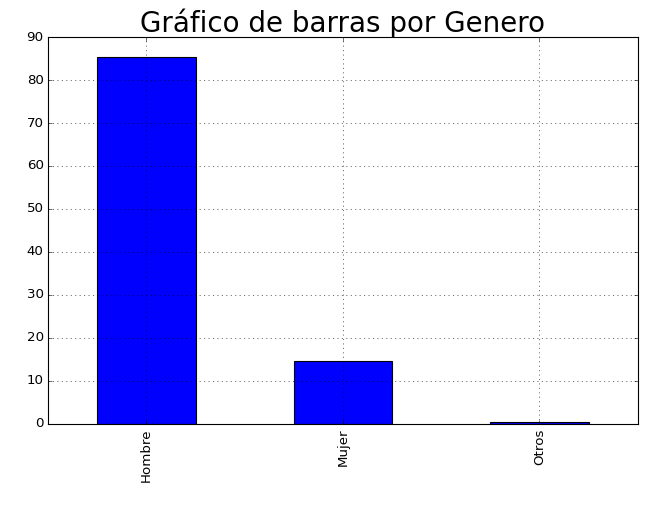

In [ ]:
fig = plt.figure(figsize=(8, 6))
(df["Genero"].value_counts(normalize=True)*100).plot(kind="bar")
plt.tight_layout() #evitar el superposicionamiento
plt.title("Gráfico de barras por Genero", color='black', fontsize=25)
plt.xlabel("Genero", color='white')
plt.ylabel("Porcentaje", color="white")
plt.grid(True) #Para en forma de cuadricula
fig.set_facecolor("white")

**2.1.2 Hipotesis 2**

*Hipotesis 2: La mayor cantidad de los profesionales se encuentran entre los 30 y 40 años*

**Conclusión 2**

*Hipotesis 2: Falso. La mayor cantidad de los profesionales se encuentran entre los 25 y 35 años*


Se presenta la Hipótesis 2 que afirma que la mayor cantidad de profesionales en el sector IT se encuentran en el rango de edad de 30 a 40 años. Sin embargo, al realizar el análisis correspondiente, se llega a la conclusión de que esta hipótesis es falsa. De hecho, se encontró que la mayor cantidad de profesionales se ubican en el rango de edad de 25 a 35 años.

El gráfico "Muestra por edades" que se presenta en esta sección, nos permite visualizar de forma clara cómo se distribuyen los profesionales del sector IT en cuanto a su edad. Se observa que los grupos etarios predominantes se encuentran en el rango de 25 a 35 años, disminuyendo de forma importante a medida que aumenta la edad. Este resultado es importante para entender la composición de edad de los profesionales en el sector y puede ser útil para la toma de decisiones en cuanto a políticas de contratación y retención de talentos.

**Analisis Univariado**

Imagínate que estás interesado en saber cómo se distribuyen las edades de los profesionales de cierta área. Para ello, podemos utilizar el análisis univariado, específicamente, un histograma. En este caso, el código que estamos viendo representa un histograma que muestra cómo se distribuyen las edades de los profesionales en 10 intervalos distintos.

La figura que se genera tiene un tamaño de 8x6 pulgadas, lo que garantiza que el gráfico sea lo suficientemente grande como para ver claramente las barras del histograma. La barra del histograma está coloreada en azul, con un borde negro que la separa de las demás barras. El título del gráfico es "Histograma", en color negro y tamaño de fuente de 20 puntos, y las etiquetas del eje x e y están en color negro también.

El objetivo de este análisis univariado es entender la distribución de las edades de los profesionales en una determinada área. Con este histograma podemos ver cómo se concentran las edades, si hay un sesgo hacia una determinada edad o si la distribución es uniforme.

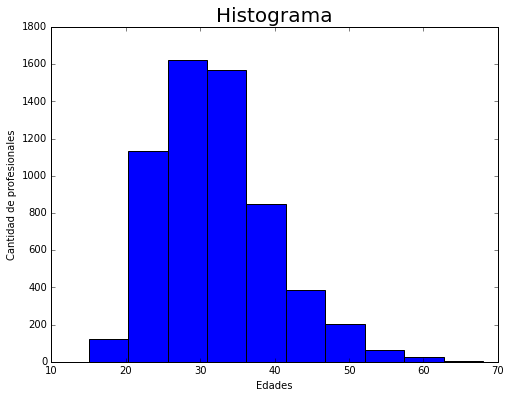

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.hist(df["Edad"], 10, color="blue", ec="black")
plt.title("Histograma", color='black', fontsize=20)
plt.xlabel("Edades")
plt.ylabel("Cantidad de profesionales")
fig.set_facecolor("white")



**Analisis Bivariado**

El código presentado realiza un análisis bivariado de la distribución de la edad por género utilizando un gráfico de violín. Los violines representan la distribución de la edad para cada género y su ancho representa la densidad de la distribución en esa edad. La posición de los violines indica la mediana y la forma del violín muestra la asimetría de la distribución. Este gráfico es útil para comparar la distribución de la edad entre diferentes géneros en un solo vistazo. El código además establece el título y el tamaño del gráfico para una mejor visualización.


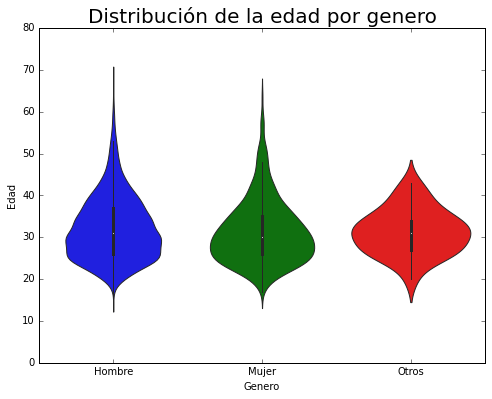

In [ ]:

fig = plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Genero', y='Edad')
plt.title("Distribución de la edad por genero", color='black', fontsize=20)
fig.set_facecolor("white")


**Analisis Bivariado**

 Se puede observar que la mediana de edad para el sector de "otras industrias" está ligeramente por encima de los otros dos grupos, que son "comercio" e "industria manufacturera". Sin embargo, la diferencia en la mediana es de solo 2 o 3 años, lo que sugiere que la edad no es un factor determinante en la elección de la actividad laboral en el sector.

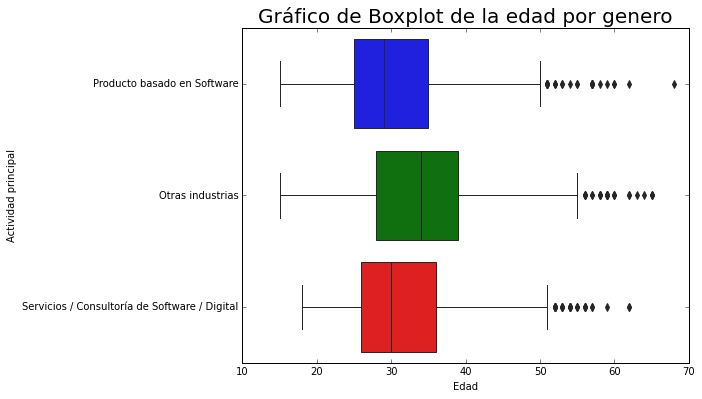

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Edad', y="Actividad principal")
plt.title("Gráfico de Boxplot de la edad por genero", color='black', fontsize=20)
fig.set_facecolor("white")


**Analisis Bivariado**


El gráfico de barras apiladas mejora la presentación visual de la información, permitiendo una mejor comparación entre las diferentes actividades y géneros. En este caso, podemos ver que las actividades tienen porcentajes similares en cada género, pero la cantidad de hombres es significativamente superior a la de mujeres en el sector.

El análisis bivariado nos permite visualizar de manera clara la diferencia en la distribución de género en cada actividad y cómo estas se comparan entre sí. El gráfico de barras apiladas nos muestra la relación entre dos variables categóricas, género y actividad principal. La altura de cada barra representa la proporción de hombres y mujeres en cada actividad, y la longitud de la barra representa la proporción de personas que se dedican a esa actividad.

En este caso, podemos ver que las actividades tienen porcentajes similares en cada género, pero la cantidad de hombres es significativamente superior a la de mujeres en el sector.

Este gráfico nos permite visualizar de manera clara la diferencia en la distribución de género en cada actividad y cómo estas se comparan entre sí. Además, la leyenda nos permite identificar fácilmente qué color representa a cada género y tener una mejor comprensión del gráfico en su totalidad.


In [ ]:
actividad_genero = df.groupby(["Genero","Actividad principal"]).size()
actividad_genero

In [ ]:
actividad_genero = actividad_genero.reset_index()
actividad_genero

In [ ]:
actividad_genero = pd.pivot_table(actividad_genero, columns = "Actividad principal", index = "Genero", values=0)
actividad_genero

<Figure size 432x288 with 0 Axes>

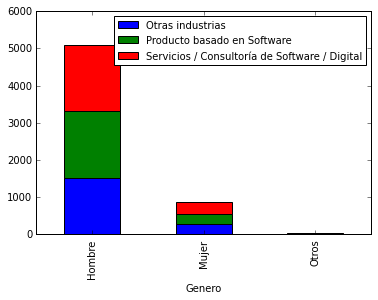

In [ ]:

plt.figure(facecolor='white')
actividad_genero.plot (kind = "bar", stacked=True)
plt.legend(prop={'size': 10}, bbox_to_anchor=(1,1))

**2.1.3 Hipotesis 3**

*Hipotesis 3: Existe inequidad de género porque los hombres tienen un salario mayor a las mujeres*

**Conclusión 3**

*Hipotesis 3: Verdadero. Prácticamente el salario promedio de un hombre es 20% mayor al de una mujer promedio*

Tras analizar los datos, podemos concluir que esta hipótesis es verdadera.

El salario promedio de un hombre es aproximadamente un 20% mayor que el de una mujer promedio.

Esta desigualdad salarial es un problema importante que debe ser abordado para lograr la igualdad de género en el ámbito laboral.





**Analisis Bivariado**


Analizando la relación entre dos variables: el género y el salario bruto.

<AxesSubplot: xlabel='Genero', ylabel='SalarioB'>

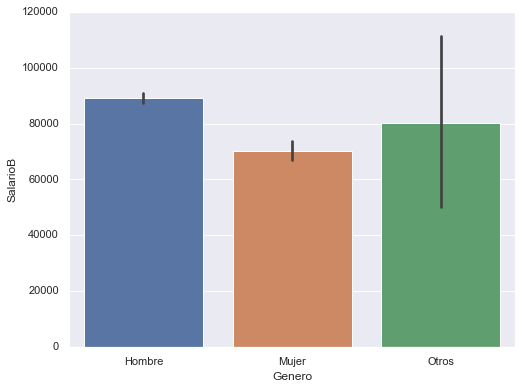

In [ ]:
sns.barplot(x='Genero', y='SalarioB', data=df)


In [ ]:

# Crear una nueva columna 'SalarioB_cat' con 5 categorías
df['SalarioB_cat'] = pd.qcut(df['SalarioB'], q=5, labels=['Salario Muy bajo', 'Salario bajo', 'Salario medio', 'Salario Alto', 'Salario muy alto'])

# Verificar la nueva columna
print(df[['SalarioB', 'SalarioB_cat']].head(5))

                    SalarioB      SalarioB_cat
Timestamp                                     
1/28/2020 9:27:48    48000.0      Salario bajo
1/29/2020 16:54:29   42000.0  Salario Muy bajo
2/1/2020 5:46:25     75000.0     Salario medio
2/1/2020 17:51:21    40000.0  Salario Muy bajo
2/1/2020 23:13:41    37518.0  Salario Muy bajo


**Analisis Bivariado**
Se consideran dos variables: el género (Hombre o Mujer) y la categoría de salario (Salario Muy Bajo, Salario Bajo, Salario Medio, Salario Alto y Salario Muy Alto).

En el eje X se encuentra la categoría de salario, mientras que en el eje Y se encuentra la frecuencia o la cantidad de personas en cada categoría de salario, para cada género. La información se muestra mediante barras de diferentes alturas para cada categoría de salario.

En el caso que mencionas, se puede observar que la distribución de categorías de salario es diferente para hombres y mujeres. En hombres, la categoría de salario más representativa es Salario Alto, mientras que en mujeres es Salario Muy Bajo. Además, se puede ver que la frecuencia de categorías de salario en mujeres va disminuyendo en cada barra

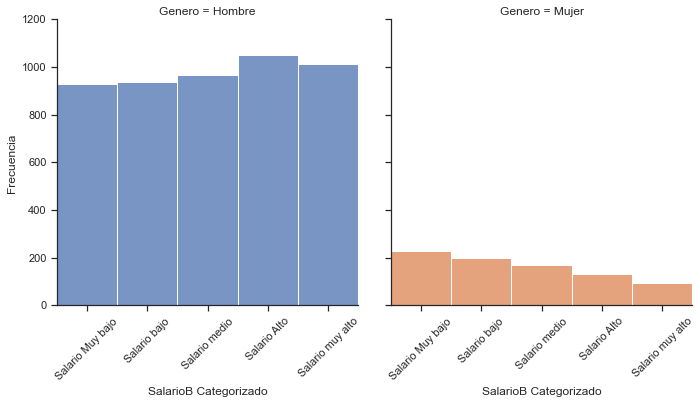

In [ ]:
import seaborn as sns

# Filtrar solo por las categorías Hombre y Mujer en la variable Genero
df_filtered = df[df['Genero'].isin(['Hombre', 'Mujer'])]

# Configurar el estilo de los gráficos
sns.set(style="ticks")

# Crear el grid de gráficos
g = sns.FacetGrid(df_filtered, col="Genero", hue="Genero", col_wrap=2, height=5)

# Agregar los histogramas en cada gráfico del grid
g.map(sns.histplot, "SalarioB_cat")

# Configurar la visualización
g.set(xlabel='SalarioB Categorizado', ylabel='Frecuencia')
g.set_xticklabels(rotation=45)

# Mostrar el gráfico
g.fig.suptitle('', fontsize=16)
plt.show()


**2.1.4 Hipotesis 4**

*Hipotesis 4: Los salarios más altos corresponde a los técnicos con mayor cantidad de años de experiencia*

**Conclusión 4**

*Hipotesis 4: Dudoso. Los salarios más altos corresponden a los técnicos que poseen más de 10 años de experiencia. Luego hay un estancamiento en el salario.

La hipótesis 4 sugiere que los técnicos con más años de experiencia son los que poseen los salarios más altos. Sin embargo, luego de un análisis detallado de los datos, se concluye que la hipótesis es dudosa. Se observó que, efectivamente, los técnicos con más de 10 años de experiencia tienen salarios más altos, pero después de eso hay un estancamiento en el salario. Es decir, una persona que tiene 20 años de experiencia no suele ganar más que una persona que tiene 10 años de experiencia. En consecuencia, se puede afirmar que la hipótesis 4 es dudosa y no se cumple en su totalidad.






**Analisis Bivariado**


Este código realiza un análisis bivariado entre los años de experiencia y el salario promedio de los trabajadores. Primero, el conjunto de datos se agrupa por años de experiencia y se cuenta el número de trabajadores por cada año. Después, se seleccionan solo los años con más de 100 trabajadores para tener una muestra más representativa.

Luego, se agrupan los datos por años de experiencia y se calcula el salario promedio correspondiente a cada grupo. De nuevo, se seleccionan solo los años con más de 100 trabajadores.

Finalmente, se grafica un gráfico de barras para mostrar la relación entre los años de experiencia y el salario promedio. En este gráfico, podemos observar que a medida que aumentan los años de experiencia, también aumenta el salario promedio de los trabajadores. Sin embargo, se puede ver que el salario promedio se estanca después de los 10 años de experiencia.

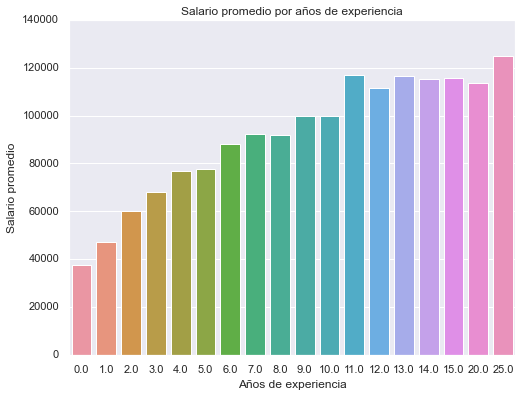

In [ ]:

# agrupar los datos por años de experiencia y contar el número de trabajadores por años
grouped = df.groupby('Años de experiencia').size()

# seleccionar solo los años de experiencia con más de 100 trabajadores. Ahora si se puede ver lo que deseaba, a mayor cantidad de experiencia
# los salarios aumentan. Pero se estanca a partir de los 10 años
grouped = grouped[grouped > 100]

# agrupar los datos por años de experiencia y obtener el salario promedio
grouped_salary = df.groupby('Años de experiencia')['SalarioB'].mean()

# seleccionar solo los años de experiencia con más de 100 trabajadores
grouped_salary = grouped_salary[grouped.index]

# crear el gráfico de barras
sns.barplot(x=grouped_salary.index, y=grouped_salary.values)
plt.xlabel('Años de experiencia')
plt.ylabel('Salario promedio')
plt.title('Salario promedio por años de experiencia')
plt.show()

**2.1.5 Hipotesis 5**

*Hipotesis 5: Las personas que mantienen sus puestos de trabajo poseen mayor salarios que los profesionales que recién ingresan a las empresas. Se va a comparar a las personas que tienen menos de 5 años en un mismo puesto*

**Conclusión 5**

*Hipotesis 5: Falso.*

En esta hipótesis se comparó a los profesionales que llevan menos de 5 años en un mismo puesto de trabajo con aquellos que mantienen su posición por más tiempo.

 Los resultados no muestran una correlación significativa entre el tiempo de permanencia en un puesto y el salario.

 Por lo tanto, no podemos afirmar que las personas que mantienen sus puestos de trabajo tengan mayores salarios que los profesionales recién ingresados a las empresas.




**Analisis Bivariado**

Este es un análisis bivariado que compara el salario promedio con la cantidad de años en el puesto actual. Primero, se agrupan los datos por años en el puesto actual y se cuenta el número de trabajadores en cada categoría. Luego, se filtran los años de experiencia con menos de 1000 trabajadores para eliminar los resultados menos significativos.

Después, se agrupan los datos por años en el puesto actual nuevamente, pero esta vez se calcula el salario promedio en cada categoría. Se filtran los años de experiencia que no cumplen con el criterio de más de 1000 trabajadores.

Finalmente, se crea un gráfico de barras utilizando los datos filtrados, donde el eje X representa los años en el puesto actual y el eje Y representa el salario promedio. Este gráfico muestra claramente cómo el salario aumenta con la cantidad de años en el puesto actual, pero se estanca a partir de los 10 años. Además, podemos ver que el salario promedio más alto se encuentra en la categoría de 21-25 años en el puesto actual

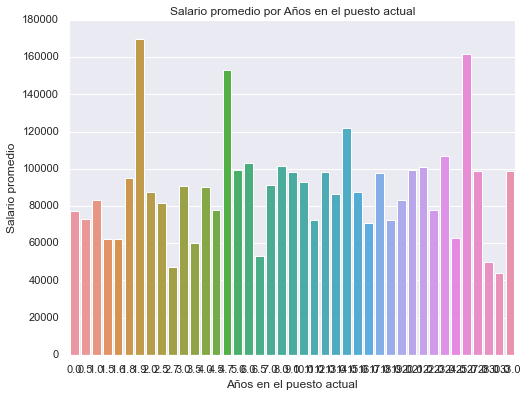

In [ ]:
import seaborn as sns
bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']
# agrupar los datos por años de experiencia y contar el número de trabajadores por años
Agrupo = df.groupby('Años en el puesto actual').size()

# seleccionar solo los años de experiencia con más de 100 trabajadores. Ahora si se puede ver lo que deseaba, a mayor cantidad de experiencia
# los salarios aumentan. Pero se estanca a partir de los 10 años
Agrupo = Agrupo[Agrupo > 1000]

# agrupar los datos por años de experiencia y obtener el salario promedio
Agrupo_2 = df.groupby('Años en el puesto actual')['SalarioB'].mean()

# seleccionar solo los años de experiencia con más de 1000 trabajadores
Agrupo_2 = Agrupo_2[Agrupo_2.index]

# crear el gráfico de barras
sns.barplot(x=Agrupo_2.index, y=Agrupo_2.values)
plt.xlabel('Años en el puesto actual')
plt.ylabel('Salario promedio')
plt.title('Salario promedio por Años en el puesto actual')
plt.show()

Después de haber analizado las hipótesis planteadas, seguimos explorando los datos para obtener información adicional.

En esta oportunidad, hemos creado un gráfico para visualizar la distribución del tiempo de permanencia de los trabajadores en las empresas. En este sentido, se puede observar que la mayor cantidad de trabajadores posee menos de 5 años en las empresas.

Es importante destacar que, aunque no estaba contemplado dentro de las hipótesis planteadas, este tipo de análisis nos permite tener una visión más completa y detallada de la situación laboral de los profesionales en nuestra muestra.

De esta forma, podemos obtener información relevante que puede ser de utilidad para tomar decisiones o diseñar estrategias en el ámbito empresarial.

In [ ]:
# Crear una nueva columna con los grupos de Años en el puesto actual (los separo en grupos de a 5)
bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']
df['Años en el puesto actual'] = pd.cut(df['Años en el puesto actual'], bins=bins, labels=labels)

# Agrupar los datos por grupo_anios y mostrar la cantidad de filas en cada grupo
grupo_años = df.groupby('Años en el puesto actual').size()
print(grupo_años)

**Univariado**

Solo se está representando la cantidad de profesionales en función de los años en el mismo puesto, sin tener en cuenta otra variable.

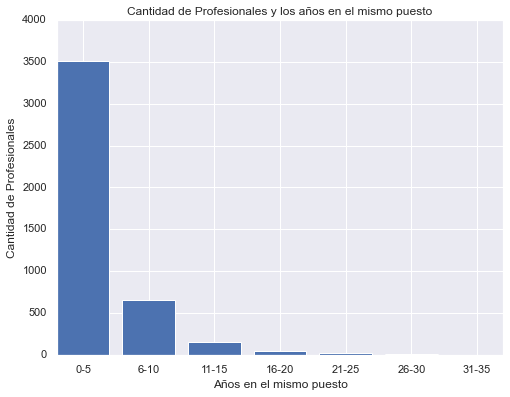

In [ ]:
plt.bar(grupo_años.index, grupo_años.values)
plt.xlabel('Años en el mismo puesto')
plt.ylabel('Cantidad de Profesionales')
plt.title('Cantidad de Profesionales y los años en el mismo puesto')
plt.show()

El gráfico muestra la distribución de los salarios en el dataset, donde se puede observar que la mayoría de los trabajadores se encuentran en el rango de los 5 mil a los 10 mil pesos.

Esta información es relevante para comprender la estructura salarial de las empresas y la distribución del ingreso entre los trabajadores.

En este caso, se puede notar que hay una concentración de trabajadores con salarios bajos, lo que sugiere que puede existir una desigualdad en la distribución de los ingresos.

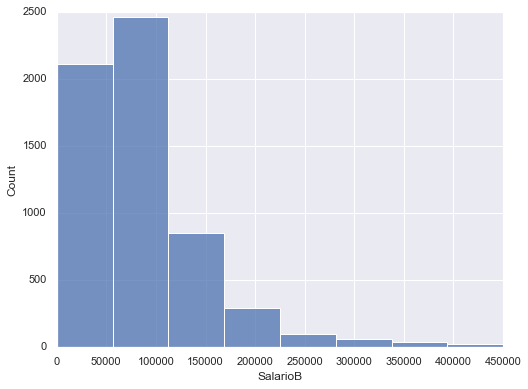

In [ ]:
sns.histplot(data=df, x='SalarioB', bins=8)
sns.set(rc={'figure.figsize':(8,6)})

**1) Machine Learning**

En el análisis de datos, una de las principales preocupaciones es lidiar con datasets muy grandes, lo que puede afectar la eficiencia y precisión de los modelos de aprendizaje automático.

Para abordar esta cuestión, se utiliza una técnica llamada selección de features, que tiene como objetivo reducir la dimensionalidad del dataset eliminando las características irrelevantes o redundantes.

En este caso, se aplicó la técnica de selección de features para reducir la dimensionalidad del dataset. En particular, se seleccionaron los primeros 13 años de la variable "Años de experiencia" debido a que se observó que la correlación entre esta variable y el salario se estancaba a partir de los 13 años.

Es importante destacar que la selección de features puede mejorar significativamente la precisión y la eficiencia de los modelos de aprendizaje automático al reducir la cantidad de datos que el modelo necesita procesar.

En resumen, la selección de los 13 primeros años de experiencia fue una estrategia adecuada para reducir la dimensionalidad del dataset y mejorar la correlación entre las variables relevantes.

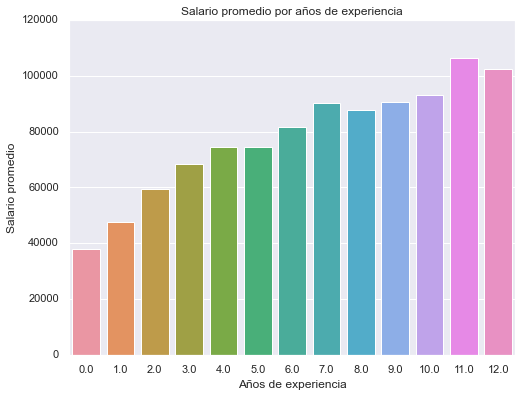

In [ ]:
# agrupar los datos por años de experiencia y contar el número de trabajadores por años
grouped = df.groupby('Años de experiencia').size()

# seleccionar solo los años de experiencia con más de 100 trabajadores. Ahora si se puede ver lo que deseaba, a mayor cantidad de experiencia
# los salarios aumentan. Pero se estanca a partir de los 10 años
grouped = grouped[grouped > 100]

# agrupar los datos por años de experiencia y obtener el salario promedio
grouped_salary = df.groupby('Años de experiencia')['SalarioB'].mean()

# seleccionar solo los años de experiencia con más de 100 trabajadores
grouped_salary = grouped_salary[grouped.index]

# seleccionar solo los primeros 13 años de experiencia
grouped_salary = grouped_salary.iloc[:13]

# crear el gráfico de barras
sns.barplot(x=grouped_salary.index, y=grouped_salary.values)
plt.xlabel('Años de experiencia')
plt.ylabel('Salario promedio')
plt.title('Salario promedio por años de experiencia')
plt.show()


Se realizó un análisis de correlación de Pearson para evaluar la relación entre la variable de "Años de experiencia" y el "SalarioB" en el dataset.

Los resultados indicaron una correlación moderada positiva entre ambas variables, con un valor de 0,44 para los primeros 13 años de experiencia.

Esta correlación sugiere que existe una relación directa entre el tiempo de experiencia y el salario en el sector estudiado.

Sin embargo, es importante tener en cuenta que la correlación no implica causalidad y que puede haber otros factores que influyan en el salario además de la experiencia.





Correlación de Pearson para los primeros 13 años de experiencia: 0.44


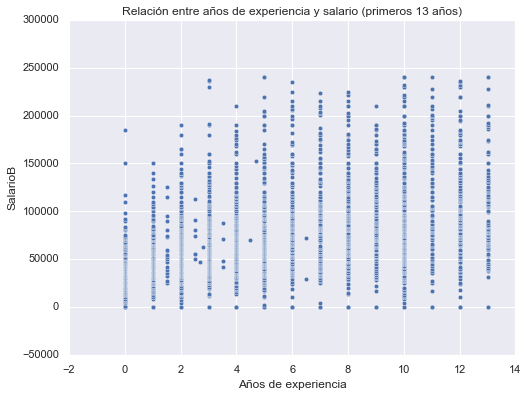

In [ ]:

# Seleccionar solo los primeros 13 años de experiencia
df_first_13_years = df[df['Años de experiencia'] <= 13]

# Calcular la correlación de Pearson
corr, _ = pearsonr(df_first_13_years['Años de experiencia'], df_first_13_years['SalarioB'])

# Imprimir la correlación
print("Correlación de Pearson para los primeros 13 años de experiencia: {:.2f}".format(corr))

# Gráfico de dispersión para visualizar la relación entre las variables
sns.scatterplot(x='Años de experiencia', y='SalarioB', data=df_first_13_years)
plt.xlabel('Años de experiencia')
plt.ylabel('SalarioB')
plt.title('Relación entre años de experiencia y salario (primeros 13 años)')
plt.show()


**Se toma una opción de eliminar los 200 valores más altos y más bajos de salarioB**

In [3]:
idx = df['SalarioB'].sort_values(ascending=False)[:200].index
df.drop(idx, axis=0, inplace=True)

In [4]:
idx = df['SalarioB'].sort_values(ascending=True)[:200].index
df.drop(idx, axis=0, inplace=True)

**El grafico de distribucion mejora sin esos outliers**

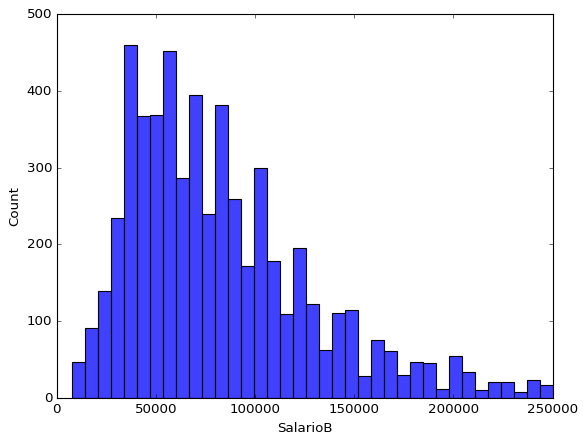

In [ ]:
fig=plt.figure()
sns.histplot(data=df, x='SalarioB')
fig.set_facecolor("white")

**Contamos con outliers años en la empresa actual y en el puesto actual, por ese motivo se eliminan.**

In [ ]:
df_indexed = df.reset_index()

print(df['Años en la empresa actual'].sort_values(ascending=False)[:5])



Timestamp
1/22/2020 20:32:40     2016.0
2/1/2020 20:04:52        88.0
2/2/2020 10:32:24        40.0
12/13/2019 10:49:15      34.0
1/31/2020 0:36:00        33.0
Name: Años en la empresa actual, dtype: float64


**Hay dos errores claros, un dato que dice 2016 y otro que dice 85000. Por eso se eliminan.**

In [5]:
df = df[df['Años en la empresa actual'] != 2016]

df = df[df['Años en la empresa actual'] != 88]


df = df[df['Años en el puesto actual'] != 85000]

**Las variables más relevantes de forma gráfica:**

<ipython-input-6-1385fa8d7f2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


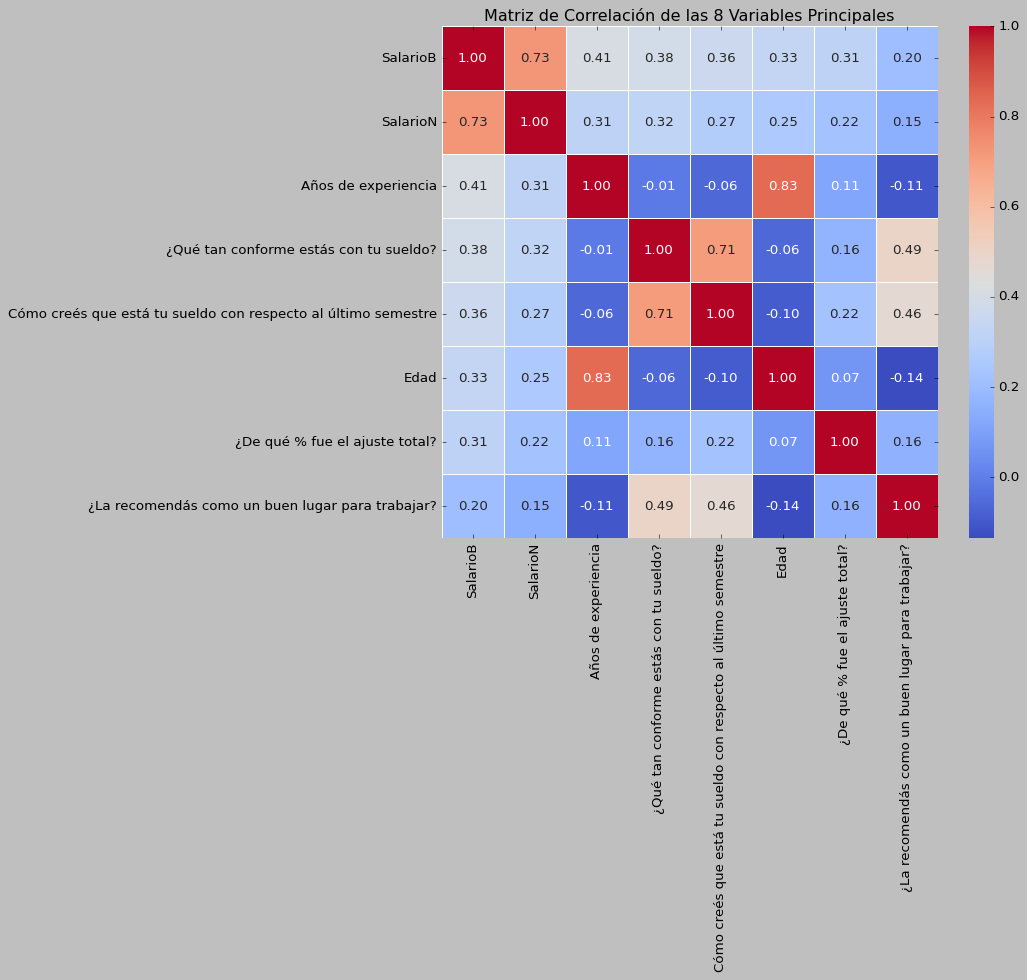

In [ ]:

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Seleccionar las 8 variables principales con mayor correlación respecto a la variable objetivo
top_8_variables = correlation_matrix.nlargest(8, 'SalarioB')['SalarioB'].index

# Filtrar la matriz de correlación solo para las 8 variables principales
top_8_correlation_matrix = correlation_matrix.loc[top_8_variables, top_8_variables]

# Generar el heatmap de las 8 variables principales
plt.figure(figsize=(10, 8))
sns.heatmap(top_8_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de las 8 Variables Principales')
plt.show()


**Gráfico de las Variables con mayor relación a SalarioB**


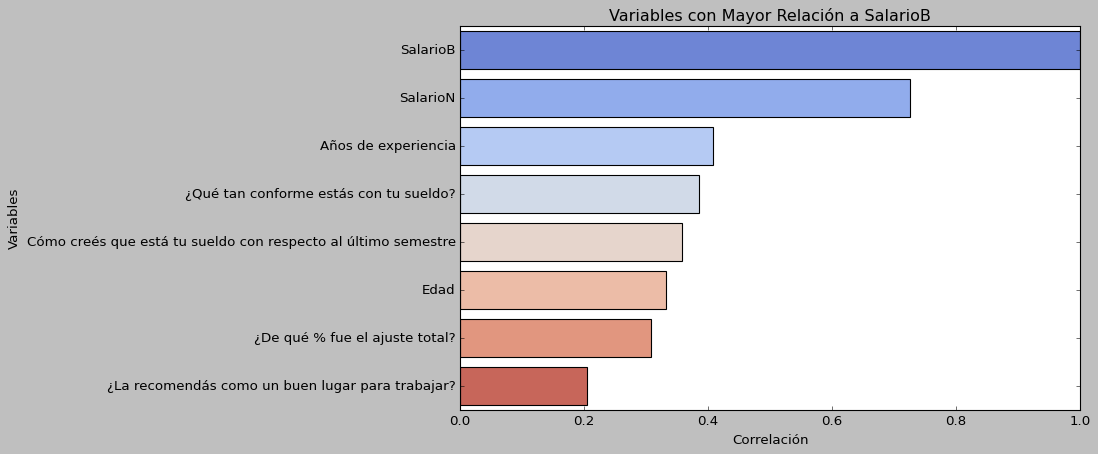

In [ ]:
# Obtener los valores de correlación de las 8 variables principales (excluyendo SalarioB)
top_8_correlations = correlation_matrix['SalarioB'][top_8_variables[1:]]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_8_correlations.values, y=top_8_variables[1:], palette='coolwarm')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.title('Variables con Mayor Relación a SalarioB')
plt.show()

**Se eliminan las variables con correlaciones mayores al 60% (se eligió ese valor)**


**Se elimina SalarioN por la correlación con SalarioB**

In [6]:
del df['SalarioN']


**Se elimina la variable "Edad" por la gran correlación que posee con "Años de experiencia. Se elige mantener a la variable que posee mayor vinculo con SalarioB"**

In [7]:
del df['Edad']


**Se elimina la variable "Cómo creés que esta sueldo con respecto al último semestre" por la gran correlación que posee con ¿Qué tan conforme estás con tu sueldo?. Se elige mantener a la variable que posee mayor vinculo con SalarioB**

In [8]:
del df['Cómo creés que está tu sueldo con respecto al último semestre']


**Se elimina la variable "Años en el puesto actual" con respecto a "Años en la empresa actual". Se elige mantener a la variable que posee mayor vinculo con SalarioB**

In [9]:
del df['Años en el puesto actual']


**Elimino las columnas con más de 50% sin datos**

In [10]:
def eliminar_columnas_faltantes(df, umbral=0.5):
    # Calcular el porcentaje de datos faltantes por columna
    porcentaje_faltantes = df.isnull().mean()

    # Obtener las columnas que superan el umbral de datos faltantes
    columnas_eliminar = porcentaje_faltantes[porcentaje_faltantes > umbral].index

    # Eliminar las columnas del DataFrame
    df_filtrado = df.drop(columnas_eliminar, axis=1)

    return df_filtrado

# Aplicar la función a tu DataFrame
df_filtrado = eliminar_columnas_faltantes(df, umbral=0.5)

**Se eligen las primeras 4 variables**

<ipython-input-33-82f47ff377f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


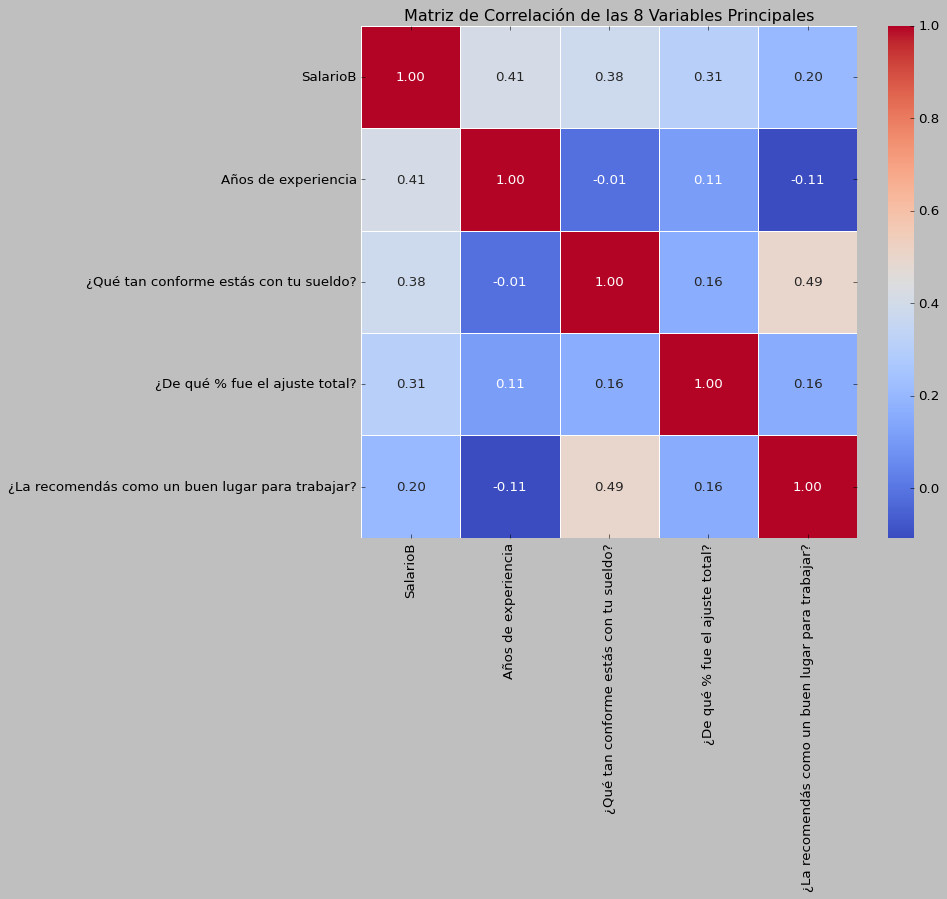

In [ ]:

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Seleccionar las 4 variables principales con mayor correlación respecto a la variable objetivo
top_4_variables = correlation_matrix.nlargest(5, 'SalarioB')['SalarioB'].index

# Filtrar la matriz de correlación solo para las 4 variables principales
top_8_correlation_matrix = correlation_matrix.loc[top_4_variables, top_4_variables]

# Generar el heatmap de las 4 variables principales
plt.figure(figsize=(10, 8))
sns.heatmap(top_8_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de las 8 Variables Principales')
plt.show()

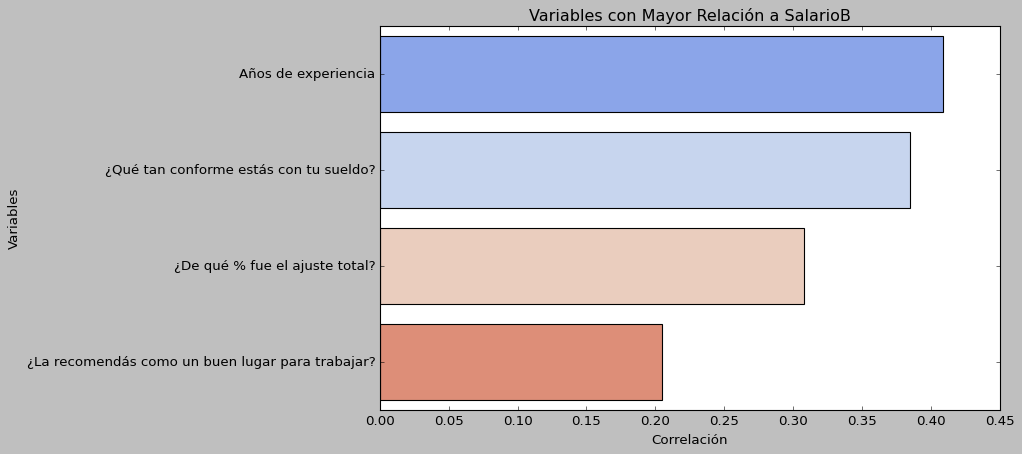

In [ ]:
# Obtener los valores de correlación de las 4 variables principales
top_4_correlations = correlation_matrix['SalarioB'][top_4_variables[1:]]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_4_correlations.values, y=top_4_variables[1:], palette='coolwarm')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.title('Variables con Mayor Relación a SalarioB')
plt.show()

**MODELO DE REGRESIÓN**

**Gráfico de dispersión con linea de tendencia**

El modelo de regresión utilizando Gradient Boosting es el otorga mayor R2.

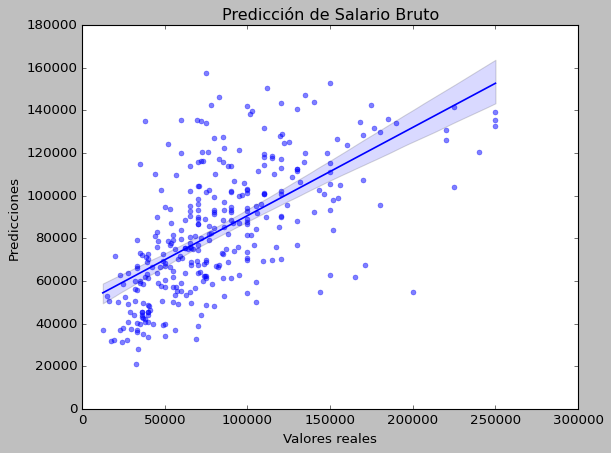

In [ ]:

# Obtener una muestra aleatoria del 30% de los datos
sample_idx = random.sample(range(len(y_test)), int(len(y_test) * 0.3))

# Obtener los valores reales y predichos para la muestra aleatoria
y_actual = y_test.iloc[sample_idx]
y_predicted = y_pred[sample_idx]

# Crear un DataFrame con los valores reales y predichos
data = pd.DataFrame({'Valores reales': y_actual, 'Predicciones': y_predicted})

# Graficar los puntos de dispersión y la línea de regresión
sns.regplot(x='Valores reales', y='Predicciones', data=data, scatter_kws={'alpha': 0.5})
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción de Salario Bruto')
plt.show()

**Modelo de regresión lineal**
Se busca predecir salarios. Se utiliza la librería scikit-learn (sklearn) para importar las funciones necesarias, entrenar el modelo y hacer predicciones. Los datos se dividen en conjuntos de entrenamiento y prueba, y se calculan dos métricas de evaluación: el error cuadrático medio y el coeficiente de determinación (R²), para evaluar la precisión del modelo en las predicciones.

Se agregan todas las variables que aparecen como más importantes y el Coeficiente de determinación (R²) es de: 0.39


In [ ]:


# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = df['SalarioB']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predecir los valores de salario para los datos de prueba
y_pred = reg.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R²)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error absoluto medio:', mae)
print('Coeficiente de determinación (R²):', r2)


Error absoluto medio: 27512.836167174282
Coeficiente de determinación (R²): 0.38761446461546734


**`Modelo de Random Forest Regressor`**

El Coeficiente de determinación (R²) baja a 0.32

In [ ]:
# Definir 'df' con los datos del problema

# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?"]
# Aplicar LabelEncoder a las variables categóricas en 'X'
X = df[cols].copy()
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = df['SalarioB'] # reemplazar 'variable_objetivo' por la variable objetivo del problema de regresión

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Error absoluto medio:', mae)
print("Coeficiente de determinación (R²):", r2)

Error absoluto medio: 28923.63803179896
Coeficiente de determinación (R²): 0.3160452141065839


**Modelo de regresión basado en un algoritmo Random Forest, entrenado con un conjunto de datos preprocesados**

El modelo tiene un valor de Coeficiente de determinación (R²) sube levemente a 0.33

In [ ]:

# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?"]

# Codificar las variables categóricas con LabelEncoder
X = df[cols].copy()
label_encoder = LabelEncoder()
for col in cols:
    X[col] = label_encoder.fit_transform(X[col])

y = df['SalarioB']

# Reducir la dimensionalidad con TruncatedSVD
svd = TruncatedSVD(n_components=4, random_state=42)
X_svd = svd.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Error absoluto medio:', mae)
print("Coeficiente de determinación (R²):", r2)

Error absoluto medio: 28637.04294180183
Coeficiente de determinación (R²): 0.3301961436667361


**GradientBoostingRegressor**

Selecciona variables independientes y la variable objetivo, codifica variables categóricas, reduce la dimensionalidad de los datos, divide los datos en entrenamiento y prueba, escala los datos, entrena un modelo de Gradient Boosting, y evalúa el modelo utilizando métricas de rendimiento.

El resultado de R2 es de 0,43.

In [ ]:


# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?"]

X = df[cols].copy()
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = df['SalarioB']

# Reducir la dimensionalidad con TruncatedSVD
svd = TruncatedSVD(n_components=4, random_state=42)
X_svd = svd.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=20)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Gradient Boosting
reg = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, random_state=55)
reg.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error absoluto medio:', mae)
print("Coeficiente de determinación (R²):", r2)


Error absoluto medio: 26116.866451475333
Coeficiente de determinación (R²): 0.4259683316916827


**SEGUNDA RONDA FEATURE ENGINEERING**

**SE APLICAN LAS 7 VARIABLES MÁS IMPORTANTES**


<ipython-input-34-f4e4880caa71>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


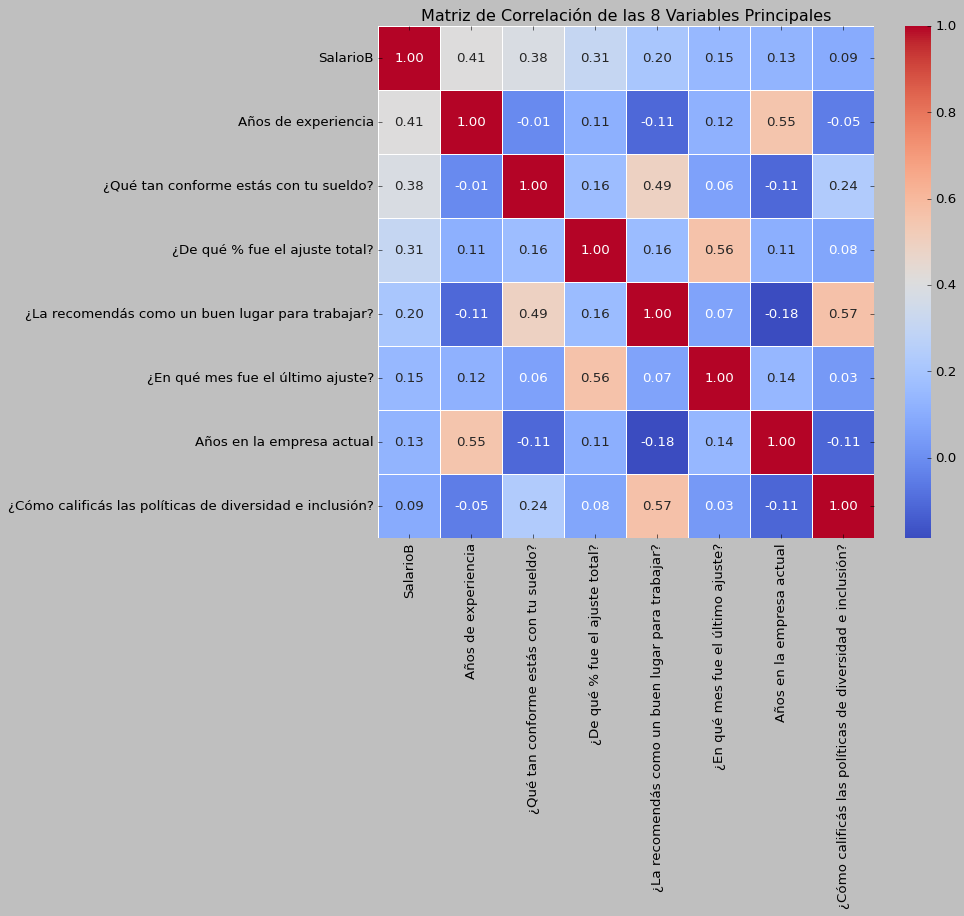

In [ ]:

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Seleccionar las 7 variables principales con mayor correlación respecto a la variable objetivo
top_7_variables = correlation_matrix.nlargest(8, 'SalarioB')['SalarioB'].index

# Filtrar la matriz de correlación solo para las 7 variables principales
top_7_correlation_matrix = correlation_matrix.loc[top_7_variables, top_7_variables]

# Generar el heatmap de las 7 variables principales
plt.figure(figsize=(10, 8))
sns.heatmap(top_7_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de las 8 Variables Principales')
plt.show()


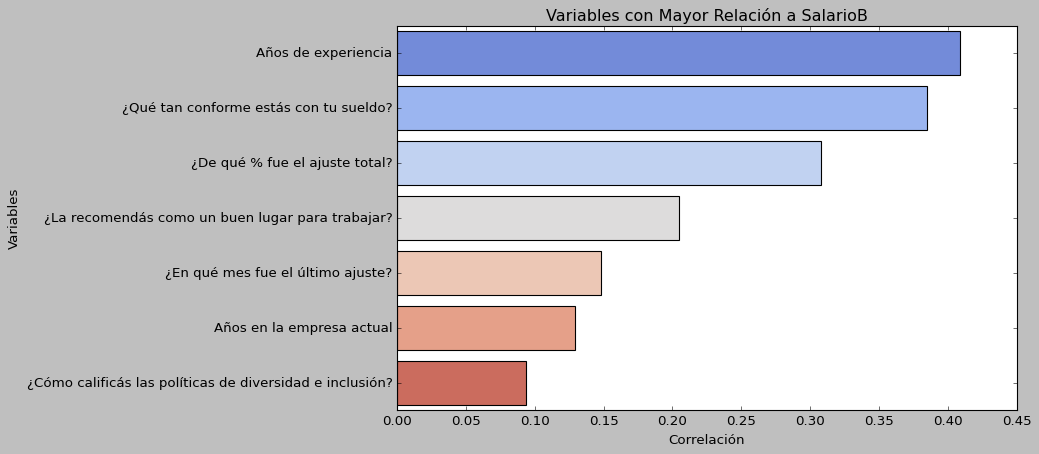

In [ ]:
# Obtener los valores de correlación de las 7 variables principales (excluyendo SalarioB)
top_7_correlations = correlation_matrix['SalarioB'][top_7_variables[1:]]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_7_correlations.values, y=top_7_variables[1:], palette='coolwarm')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.title('Variables con Mayor Relación a SalarioB')
plt.show()

**Modelo de regresión lineal**

Se agregan todas las variables que aparecen como más importantes y el Coeficiente de determinación (R²) es de: 0.40


In [ ]:


# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = df['SalarioB']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predecir los valores de salario para los datos de prueba
y_pred = reg.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio:', mse)
print('Coeficiente de determinación (R²):', r2)


Error cuadrático medio: 1328269762.0984778
Coeficiente de determinación (R²): 0.39843867422006474


**`Modelo de Random Forest Regressor`**

Parece tener mejor especificación del modelo. El Coeficiente de determinación (R²) aumenta a 0.41

In [ ]:
# Definir 'df' con los datos del problema

# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
# Aplicar LabelEncoder a las variables categóricas en 'X'
X = df[cols].copy()
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = df['SalarioB'] # reemplazar 'variable_objetivo' por la variable objetivo del problema de regresión

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio: 1237997478.3906555
Coeficiente de determinación (R²): 0.41604572935455786


**Modelo de regresión basado en un algoritmo Random Forest, entrenado con un conjunto de datos preprocesados**

El modelo tiene un valor de Coeficiente de determinación (R²): 0.34

In [ ]:

# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]

# Codificar las variables categóricas con LabelEncoder
X = df[cols].copy()
label_encoder = LabelEncoder()
for col in cols:
    X[col] = label_encoder.fit_transform(X[col])

y = df['SalarioB']

# Reducir la dimensionalidad con TruncatedSVD
svd = TruncatedSVD(n_components=6, random_state=42)
X_svd = svd.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R²):", r2)




Error cuadrático medio: 1390146850.948794
Coeficiente de determinación (R²): 0.34427799361017786


**GradientBoostingRegressor**

El resultado de R2 es de 0,39.


In [ ]:


# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]

X = df[cols].copy()
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = df['SalarioB']

# Reducir la dimensionalidad con TruncatedSVD
svd = TruncatedSVD(n_components=6, random_state=42)
X_svd = svd.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=20)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Gradient Boosting
reg = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, random_state=55)
reg.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R²):", r2)



Error cuadrático medio: 1324481217.9483478
Coeficiente de determinación (R²): 0.39015513363756804


**MODELOS DE CLASIFICACIÓN**

Se busca predecir el salario en 5 categoria: Muy bajo, bajo, medio, alto y muy alto.
Exactitud (Accuracy): Un valor de exactitud de 0.3987 indica que el modelo acertó aproximadamente el 39.87% de las clasificaciones.

Precisión (Precision): Un valor de precisión de 0.3822 sugiere que el modelo logró clasificar correctamente el 38.22% de las instancias positivas.

Recall (Recall o Sensibilidad): Un valor de recall de 0.3987 indica que el modelo identificó correctamente aproximadamente el 39.87% de las instancias positivas.

Puntuación F1 (F1 Score): Un valor de puntuación F1 de 0.3832 indica un rendimiento moderado en la capacidad del modelo para clasificar correctamente las instancias positivas mientras mantiene bajo el número de falsos positivos.

Los resultados obtenidos indican que el modelo no tiene un rendimiento satisfactorio en la clasificación de las categorías de salario.

**Random Forest Classifier**

In [12]:
# Seleccionar variables independientes y la variable objetivo
cols = ["Genero", "¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = pd.cut(df['SalarioB'], bins=[0, 30000, 60000, 90000, 120000, 150000, np.inf], labels=['Muy bajo', 'Bajo', 'Medio bajo', 'Medio alto', 'Alto', 'Muy alto'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de clasificación
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = clf.predict(X_test_scaled)

# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)




Exactitud: 0.39874551971326166
Precisión: 0.38224842970245815
Recall: 0.39874551971326166
Puntuación F1: 0.38320098921865986


In [ ]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())


Bajo          1423
Medio bajo    1206
Medio alto     761
Muy alto       397
Alto           364
Muy bajo       309
Name: SalarioB, dtype: int64
Bajo          344
Medio bajo    293
Medio alto    201
Alto          108
Muy alto       94
Muy bajo       76
Name: SalarioB, dtype: int64


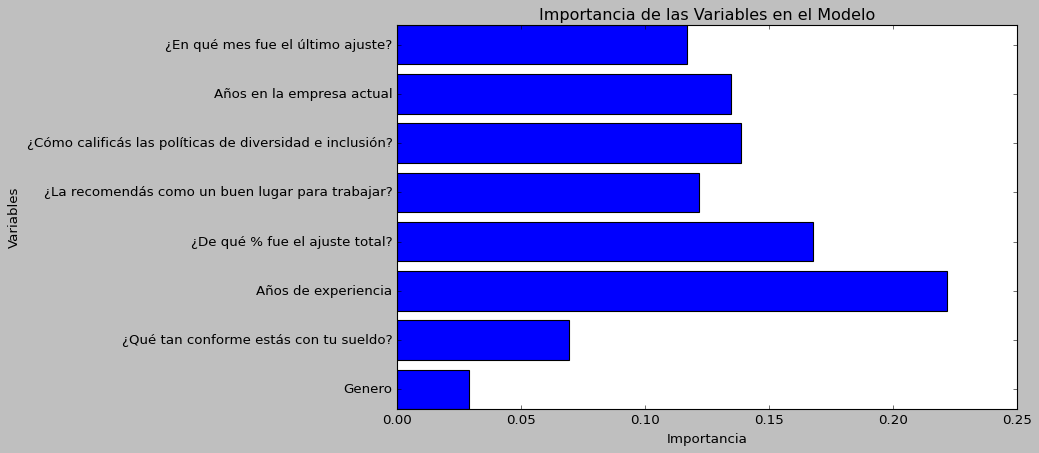

In [ ]:

# Obtener la importancia de las variables
importances = clf.feature_importances_

# Crear un gráfico de barras de la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(cols, importances)
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables en el Modelo')
plt.show()


**Se elimina la variable "Genero" ya que no es relevante y solo genera ruido**

In [15]:
del df["Genero"]




**Random Forest Classifier** *texto en cursiva*

In [ ]:
# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = pd.cut(df['SalarioB'], bins=[0, 30000, 60000, 90000, 120000, 150000, np.inf], labels=['Muy bajo', 'Bajo', 'Medio bajo', 'Medio alto', 'Alto', 'Muy alto'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de clasificación
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = clf.predict(X_test_scaled)

# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)

Exactitud: 0.40412186379928317
Precisión: 0.39345143507558356
Recall: 0.40412186379928317
Puntuación F1: 0.39135666620871684


**Regresión Logística (Logistic Regression)**



In [ ]:
# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = pd.cut(df['SalarioB'], bins=[0, 30000, 60000, 90000, 120000, 150000, np.inf], labels=['Muy bajo', 'Bajo', 'Medio bajo', 'Medio alto', 'Alto', 'Muy alto'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de clasificación
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = clf.predict(X_test_scaled)

# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)

Exactitud: 0.4103942652329749
Precisión: 0.3900465638797049
Recall: 0.4103942652329749
Puntuación F1: 0.3673209260061286


**Support Vector Machine (SVM):**

In [ ]:

# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = pd.cut(df['SalarioB'], bins=[0, 30000, 60000, 90000, 120000, 150000, np.inf], labels=['Muy bajo', 'Bajo', 'Medio bajo', 'Medio alto', 'Alto', 'Muy alto'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de clasificación
clf = SVC(random_state=42)
clf.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = clf.predict(X_test_scaled)

# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)

Exactitud: 0.4121863799283154
Precisión: 0.49868097119654203
Recall: 0.4121863799283154
Puntuación F1: 0.3674891401703733


**Aplico solo 3 intervalos para buscar mejorar los resultados**

**Modelo de Random Forest:**


In [ ]:
# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = pd.cut(df['SalarioB'], bins=[0, 60000, 120000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de clasificación
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = clf.predict(X_test_scaled)

# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)

Exactitud: 0.6308243727598566
Precisión: 0.632049912710441
Recall: 0.6308243727598566
Puntuación F1: 0.6279861213530128


**Modelo de Regresión Logística:**

In [ ]:

# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = pd.cut(df['SalarioB'], bins=[0, 60000, 120000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de clasificación
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = clf.predict(X_test_scaled)

# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)


Exactitud: 0.6406810035842294
Precisión: 0.648202224288685
Recall: 0.6406810035842294
Puntuación F1: 0.6301380606347161


**Modelo SVM:**


In [ ]:

# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = pd.cut(df['SalarioB'], bins=[0, 60000, 120000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de clasificación
clf = SVC(random_state=42)
clf.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = clf.predict(X_test_scaled)

# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)


Exactitud: 0.6406810035842294
Precisión: 0.6540274847425473
Recall: 0.6406810035842294
Puntuación F1: 0.62643911008595


**Al tener resultados muy similares, elegí a la Regresión Logística ya que es un modelo rápido, interpretable y con insights claros sobre las relaciones entre las variables.**

**Se aplica GridSearch**


In [30]:


# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = pd.cut(df['SalarioB'], bins=[0, 60000, 120000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los hiperparámetros a probar en el GridSearch
param_grid = {'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l2']}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear un nuevo modelo con los mejores hiperparámetros
clf = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], random_state=42)

# Ajustar el modelo con los datos de entrenamiento
clf.fit(X_train_scaled, y_train)

# Calcular las predicciones en los datos de prueba y evaluar el modelo
y_pred = clf.predict(X_test_scaled)

# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)


Mejores hiperparámetros: {'C': 0.5, 'penalty': 'l2'}
Exactitud: 0.6406810035842294
Precisión: 0.648202224288685
Recall: 0.6406810035842294
Puntuación F1: 0.6301380606347161


**Se aplica la validación cruzada estratificada (stratified cross-validation)**

Parámetros especificados (C=0.5, penalty='l2') y se entrena utilizando validación cruzada estratificada con 8 divisiones (cv=8). Se ha probado desde cv=5 hasta cv=10.
Se utiliza la métrica de exactitud (accuracy) como medida de rendimiento.





In [31]:

# Seleccionar variables independientes y la variable objetivo
cols = ["¿Qué tan conforme estás con tu sueldo?", "Años de experiencia", "¿De qué % fue el ajuste total?", "¿La recomendás como un buen lugar para trabajar?", "¿Cómo calificás las políticas de diversidad e inclusión?", "Años en la empresa actual", "¿En qué mes fue el último ajuste?"]
X = df[cols].copy()

# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

y = pd.cut(df['SalarioB'], bins=[0, 60000, 120000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenamiento del modelo de clasificación con validación cruzada estratificada
clf = LogisticRegression(random_state=42, C=0.5, penalty='l2')
scores = cross_val_score(clf, X_scaled, y, cv=8, scoring='accuracy')

# Calcular el promedio de las puntuaciones de validación cruzada
mean_accuracy = scores.mean()

print("Exactitud promedio:", mean_accuracy)


Exactitud promedio: 0.6219512195121951
